In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scvelo as scv
import scanpy

import warnings
warnings.filterwarnings('ignore')

In [7]:
adata = scv.read('/Users/xuezhengyang/Documents/Xue/Dynamo-Tutorial/data/DentateGyrus/10X43_1.h5ad',cache=True)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:28) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


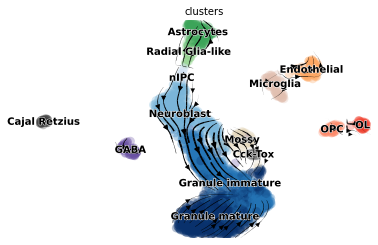

In [8]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, basis='umap')

In [9]:
scv.tl.velocity_confidence(adata)
print(adata)

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)
AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_count_corr', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_umap', 'X_pca', 'velocity_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'


In [13]:

# print(type(adata.layers['velocity']))
# print(new)

# scanpy.pp.filter_genes(adata, min_cells=1, max_cells=None) 
# data = adata.X
# data = pd.DataFrame.sparse.from_spmatrix(data)
# print(data)

u = adata.to_df(layer='unspliced')
u = u.loc[:,(u!=0).any(axis=0)]
print(u.columns)
print(u.shape)

var_name = u.columns

# print(adata.var)
adata = adata[:,adata.var.index.isin(var_name)]
print(adata.shape)

array1 = np.nan_to_num(adata.layers['velocity'],copy=False)

mask = (array1 == 0).all(0)
column_indices = np.where(mask)[0]
array1 = array1[:,~mask]
print(array1.shape)
adata.layers['velocity'] = array1

Index(['Tcea1', 'Atp6v1h', 'Rb1cc1', 'St18', 'Pcmtd1', 'Adhfe1', 'Sgk3',
       'Mcmdc2', 'Cspp1', 'Prex2',
       ...
       'Egfl6', 'Tmsb4x', 'Prps2', 'Frmpd4', 'Msl3', 'Kdm5d', 'Eif2s3y',
       'Erdr1', 'Uty', 'Ddx3y'],
      dtype='object', name='index', length=8614)
(2930, 8614)
(2930, 8614)
(2930, 8614)


In [14]:
import eval_util_ScVelo
from imp import reload
reload(eval_util_ScVelo)


cluster_edges = [("OPC", "OL")]
eval_util_ScVelo.evaluate(adata, cluster_edges, 'clusters', "velocity", x_emb="X_umap")

# Cross-Boundary Transition Score (A->B)
{('OPC', 'OL'): 0.0}
Total Mean: nan
# Cross-Boundary Velocity Coherence (A->B)
{('OPC', 'OL'): 0.5011843}
Total Mean: 0.5011842846870422
# Cross-Boundary Direction Correctness (A->B)
{('OPC', 'OL'): -0.9465627012463194}
Total Mean: -0.9465627012463194
# In-cluster Coherence
{'Astrocytes': 0.8496428, 'Cajal Retzius': 0.9841771, 'Cck-Tox': 0.9363845, 'Endothelial': 0.9231923, 'GABA': 0.91460454, 'Granule immature': 0.8480398, 'Granule mature': 0.79827553, 'Microglia': 0.9691641, 'Mossy': 0.8962831, 'Neuroblast': 0.91757, 'OL': 0.94979745, 'OPC': 0.9320423, 'Radial Glia-like': 0.9027852, 'nIPC': 0.9529655}
Total Mean: 0.9124945998191833
# In-cluster Confidence
{'Astrocytes': 0.8935306196411451, 'Cajal Retzius': 0.9818566862274619, 'Cck-Tox': 0.9140310000490259, 'Endothelial': 0.822030504544576, 'GABA': 0.8989460722344821, 'Granule immature': 0.8426621058943925, 'Granule mature': 0.802236801887227, 'Microglia': 0.8813234942930716, 'Mossy': 0.882580

{'Cross-Boundary Transition Score (A->B)': {('OPC', 'OL'): [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]},
 'Cross-Boundary Velocity Coherence (A->B)': {('OPC', 'OL'): [0.5030985,
   0.49199975,
   0.5063405,
   0.49389446,
   0.5206738,
   0.5314838,
   0.48976135,
   0.4957409,
   0.47766554]},
 'Cross-Boundary Direction Correctness (A->B)': {('OPC',
   'OL'): [-0.9850868045505886, -0.9487441629652785, -0.9922430577659892, -0.9729598020213557, -0.9905411472004327, -0.8913512381842796, -0.7607564125123236, -0.9800159087822331, -0.9973657772343929]},
 'In-cluster Coherence': {'Astrocytes': [0.8267289,
   0.92273414,
   0.8609524,
   0.87382686,
   0.8685933,
   0.8312215,
   0.86675745,
   0.867974,
   0.77313775,
   0.86623687,
   0.783435,
   0.86865944,
   0.85298175,
   0.92353,
   0.8644522,
   0.862242,
   0.80215305,
   0.7870322,
   0.92147344,
   0.8915132,
   0.80233496,
   0.8531142,
   0.79341304,
   0.8895528,
   0.86260635,
   0.870539,
   0.863745